<a href="https://colab.research.google.com/github/SebastianSanchez22/ML_DL-Classifier/blob/main/vehicleType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import glob
from google.colab.patches import cv2_imshow

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

#Cargado De Imagenes Y Creacion De Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "/content/drive/MyDrive/IA/Diabetic/Diaberic-Retinopathy.zip"

#Traer los nombres de los archivos a un array
#cars= np.array(glob.glob('Dataset/cars/*.jpg'))
#trains= np.array(glob.glob('Dataset/trains/*.jpg'))
#planes = np.array(glob.glob('Dataset/planes/*.jpg'))
#Verificar el tamano del dataset

#print("Cars: ",cars.shape)
#print("Trains: ",trains.shape)
#print("Planes: ",planes.shape)

#aqui iba el metodo con el que se hizo el resize

#for i in range (1200):
  #print(images[i])



Images:  (1200,)
/content/drive/MyDrive/IA/resized/plane386.jpg   :  plane
/content/drive/MyDrive/IA/resized/train94.jpg   :  train
/content/drive/MyDrive/IA/resized/plane31.jpg   :  plane
/content/drive/MyDrive/IA/resized/car298.jpg   :  car
/content/drive/MyDrive/IA/resized/train208.jpg   :  train
/content/drive/MyDrive/IA/resized/train69.jpg   :  train
/content/drive/MyDrive/IA/resized/train306.jpg   :  train
/content/drive/MyDrive/IA/resized/car128.jpg   :  car
/content/drive/MyDrive/IA/resized/train163.jpg   :  train
/content/drive/MyDrive/IA/resized/car161.jpg   :  car
/content/drive/MyDrive/IA/resized/plane273.jpg   :  plane
/content/drive/MyDrive/IA/resized/car170.jpg   :  car
/content/drive/MyDrive/IA/resized/train297.jpg   :  train
/content/drive/MyDrive/IA/resized/car341.jpg   :  car
/content/drive/MyDrive/IA/resized/car331.jpg   :  car
/content/drive/MyDrive/IA/resized/train325.jpg   :  train
/content/drive/MyDrive/IA/resized/plane25.jpg   :  plane
/content/drive/MyDrive/IA

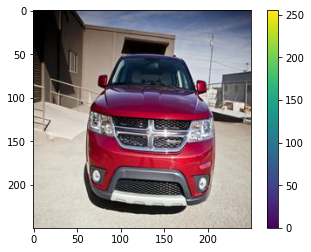

In [ ]:
a = np.full((400),"car")
b = np.full((400),"plane")
c = np.full((400),"train")

labels = np.concatenate((a,b,c))
#images = np.array(glob.glob('/content/drive/MyDrive/IA/VehicleType/resized/*.jpg'))
images = np.array(glob.glob('/content/drive/MyDrive/IA/resized/*.jpg'))
images.sort()
print("Images: ",images.shape)

#Prueba
img = plt.imread(images[0])
plt.imshow(img)
plt.grid(False)
plt.colorbar()
images


for i in range(100000):
  x = np.random.randint(0,len(images)-1)
  y = np.random.randint(0,len(images)-1)
  iaux = images[x]
  laux = labels[x]
  images[x] = images[y]
  labels[x] = labels[y]
  images[y] = iaux
  labels[y] = laux

for i in range (50):
  print(images[i],"  : ",labels[i])

print("Images: ",images.shape)
print("Labels: ",labels.shape)


In [ ]:
df=pd.DataFrame({'images':images, 'class':labels})
df

,images,class
0,/content/drive/MyDrive/IA/resized/plane386.jpg,plane
1,/content/drive/MyDrive/IA/resized/train94.jpg,train
2,/content/drive/MyDrive/IA/resized/plane31.jpg,plane
3,/content/drive/MyDrive/IA/resized/car298.jpg,car
4,/content/drive/MyDrive/IA/resized/train208.jpg,train
...,...,...
1195,/content/drive/MyDrive/IA/resized/train351.jpg,train
1196,/content/drive/MyDrive/IA/resized/train330.jpg,train
1197,/content/drive/MyDrive/IA/resized/car357.jpg,car
1198,/content/drive/MyDrive/IA/resized/plane341.jpg,plane


#Modelo propio

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=8,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(250,250))

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=8,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(250,250))

Found 1020 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(16, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(16, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.1))

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.1))

classifier.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


early_stop  = EarlyStopping(monitor='val_loss', patience=100)
check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
epochs=10
history = classifier.fit(train_generator,epochs = epochs,validation_data = validation_generator , callbacks=[early_stop, check_point], verbose=1)

Epoch 1/10
128/128 [==============================] - 14s 54ms/step - loss: 0.7772 - accuracy: 0.6363 - val_loss: 0.5132 - val_accuracy: 0.7778
Epoch 2/10
128/128 [==============================] - 6s 49ms/step - loss: 0.4096 - accuracy: 0.8549 - val_loss: 0.4070 - val_accuracy: 0.8444
Epoch 3/10
128/128 [==============================] - 9s 68ms/step - loss: 0.2604 - accuracy: 0.9186 - val_loss: 0.5469 - val_accuracy: 0.7722
Epoch 4/10
128/128 [==============================] - 5s 38ms/step - loss: 0.1064 - accuracy: 0.9686 - val_loss: 0.4277 - val_accuracy: 0.8389
Epoch 5/10
128/128 [==============================] - 5s 38ms/step - loss: 0.0573 - accuracy: 0.9824 - val_loss: 0.6046 - val_accuracy: 0.8333
Epoch 6/10
128/128 [==============================] - 5s 39ms/step - loss: 0.0797 - accuracy: 0.9735 - val_loss: 0.7316 - val_accuracy: 0.8278
Epoch 7/10
128/128 [==============================] - 5s 38ms/step - loss: 0.0103 - accuracy: 0.9990 - val_loss: 0.8150 - val_accuracy: 0.838

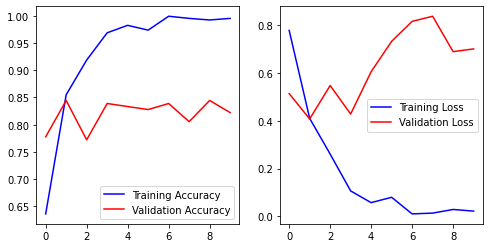

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

##Guardar Y Cargar Modelo

In [ ]:
classifier.save('/content/drive/MyDrive/IA/ModelosEntrenados/Vehicle_propio.tf', save_format='tf')
classifier=keras.models.load_model('/content/drive/MyDrive/IA/ModelosEntrenados/Vehicle_propio.tf')

In [ ]:
predictions=classifier.predict(validation_generator)

23/23 [==============================] - 1s 30ms/step


In [ ]:
print(train_generator.class_indices)
labels_test=validation_generator.labels
data_val=validation_generator.filepaths
predictions_label=[np.argmax(element) for element in predictions]

{'car': 0, 'plane': 1, 'train': 2}


Text(0.5, 0, 'train  0 (plane)')

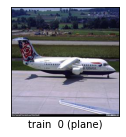

In [ ]:

class_names = ["car","plane","train"]
index_image=10
plt.figure(figsize=(2,2))
plt.grid(False)
plt.xticks([])
plt.yticks([])
im=plt.imread(data_val[index_image])
plt.imshow(im)

predicted_label = class_names[np.argmax(predictions[index_image])]

real_label = class_names[labels_test[index_image]]
plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                              predictions[index_image][0],
                              real_label))

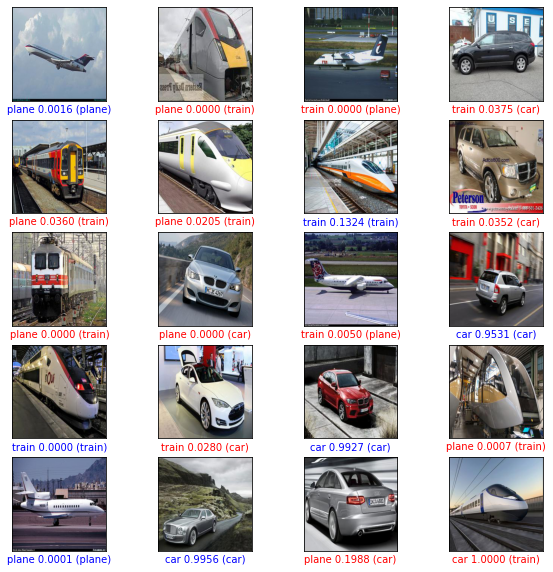

In [ ]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = class_names[np.argmax(predictions[index_image])]
  real_label = class_names[labels_test[index_image]]
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

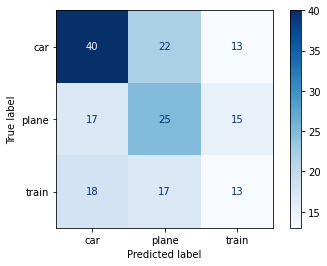

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#Utilizando Inception v3


In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=16,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(299,299))

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=16,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(299,299))

Found 1020 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
modelInceptionV3=InceptionV3()

In [ ]:
modelInception = InceptionV3(include_top=False, input_shape=(299, 299, 3))
for layer in modelInception.layers:
  layer.trainable = False
x = Flatten()(modelInception.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(3, activation='softmax')(x)
modelInception = keras.Model(inputs=modelInception.inputs, outputs=output)
modelInception.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
  history = modelInception.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=10, verbose=1)

Epoch 1/10
64/64 [==============================] - 16s 151ms/step - loss: 0.9861 - accuracy: 0.9676 - val_loss: 0.1603 - val_accuracy: 0.9944
Epoch 2/10
64/64 [==============================] - 6s 93ms/step - loss: 0.1378 - accuracy: 0.9961 - val_loss: 0.2194 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 6s 94ms/step - loss: 0.0611 - accuracy: 0.9990 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 6s 95ms/step - loss: 6.1616e-14 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 6s 94ms/step - loss: 6.1615e-14 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 6s 94ms/step - loss: 6.1597e-14 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 6s 94ms/step - loss: 6.1515e-14 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.

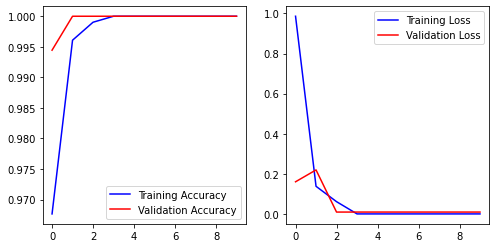

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=modelInception.predict(validation_generator)

12/12 [==============================] - 2s 75ms/step


In [ ]:
print(train_generator.class_indices)
labels_test=validation_generator.labels
data_val=validation_generator.filepaths
predictions_label=[np.argmax(element) for element in predictions]

{'car': 0, 'plane': 1, 'train': 2}


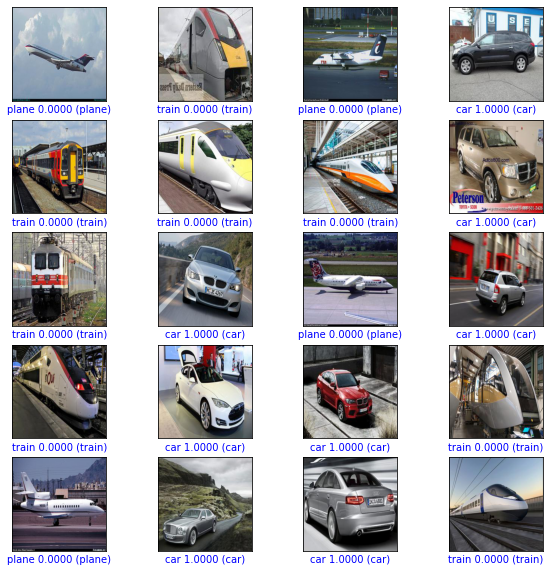

In [ ]:
class_names = ["car","plane","train"]

plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = class_names[np.argmax(predictions[index_image])]
  real_label = class_names[labels_test[index_image]]
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

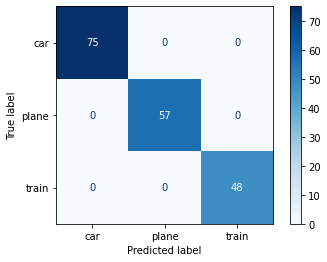

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#ResNet50

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=16,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(224,224))

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=16,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(224,224))

Found 1020 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
modelResNet50=ResNet50(include_top=False, pooling='max', weights='imagenet', input_shape=(224, 224, 3))
for layer in modelResNet50.layers:
  layer.trainable = False
x = modelResNet50.output
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation="softmax")(x)
modelResNet50 = Model(inputs=modelResNet50.input, outputs=predictions)

In [ ]:
modelResNet50.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = modelResNet50.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=10, verbose=1)

Epoch 1/10
64/64 [==============================] - 11s 108ms/step - loss: 1.2784 - accuracy: 0.5853 - val_loss: 0.6161 - val_accuracy: 0.7500
Epoch 2/10
64/64 [==============================] - 5s 79ms/step - loss: 0.5257 - accuracy: 0.7667 - val_loss: 0.7341 - val_accuracy: 0.6444
Epoch 3/10
64/64 [==============================] - 5s 78ms/step - loss: 0.4784 - accuracy: 0.8069 - val_loss: 0.4099 - val_accuracy: 0.8333
Epoch 4/10
64/64 [==============================] - 5s 79ms/step - loss: 0.3184 - accuracy: 0.8951 - val_loss: 0.4025 - val_accuracy: 0.8278
Epoch 5/10
64/64 [==============================] - 5s 80ms/step - loss: 0.3137 - accuracy: 0.8814 - val_loss: 0.4634 - val_accuracy: 0.8333
Epoch 6/10
64/64 [==============================] - 5s 78ms/step - loss: 0.2764 - accuracy: 0.9010 - val_loss: 0.4236 - val_accuracy: 0.8333
Epoch 7/10
64/64 [==============================] - 5s 79ms/step - loss: 0.2875 - accuracy: 0.8941 - val_loss: 0.4216 - val_accuracy: 0.8333
Epoch 8/10


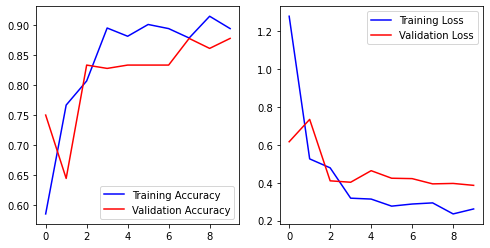

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=modelResNet50.predict(validation_generator)

12/12 [==============================] - 2s 67ms/step


In [ ]:
print(train_generator.class_indices)
labels_test=validation_generator.labels
data_val=validation_generator.filepaths
predictions_label=[np.argmax(element) for element in predictions]

{'car': 0, 'plane': 1, 'train': 2}


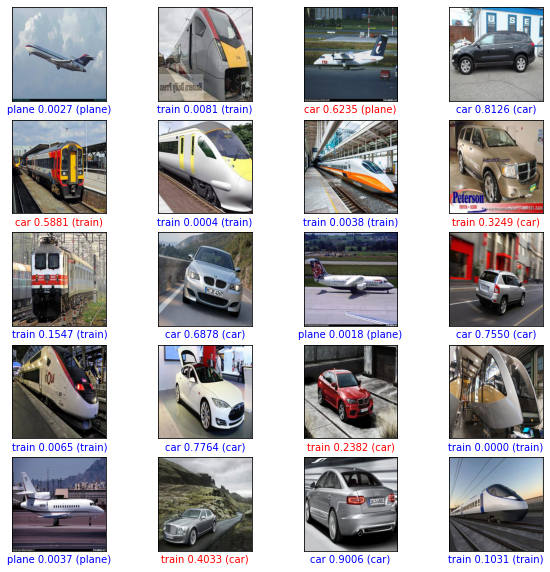

In [ ]:
class_names = ["car","plane","train"]

plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = class_names[np.argmax(predictions[index_image])]
  real_label = class_names[labels_test[index_image]]
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

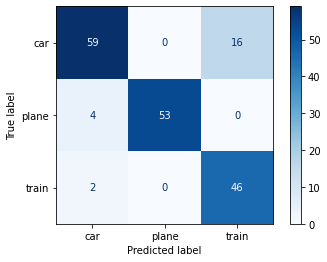

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#VGG16

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=32,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(224,224))

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=32,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(224,224))

Found 1020 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD

In [ ]:
VGG16 = VGG16(include_top=False, input_shape=(224, 224, 3))
VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in VGG16.layers:
  layer.trainable = False
x = Flatten()(VGG16.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(3, activation='softmax')(x)

VGG16 = Model(inputs=VGG16.inputs, outputs=output)

#opt = SGD(lr=0.001, momentum=0.9)
VGG16.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10
history = VGG16.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=epochs, verbose=1)

Epoch 1/10
32/32 [==============================] - 15s 363ms/step - loss: 0.6591 - accuracy: 0.8588 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 2/10
32/32 [==============================] - 6s 197ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0310 - val_accuracy: 0.9889
Epoch 3/10
32/32 [==============================] - 6s 197ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 6s 199ms/step - loss: 9.5526e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 6s 201ms/step - loss: 4.9890e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 6s 201ms/step - loss: 4.0999e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 6s 201ms/step - loss: 3.5501e-04 - accuracy: 1.0000 - val_loss: 0.0055 - val_accura

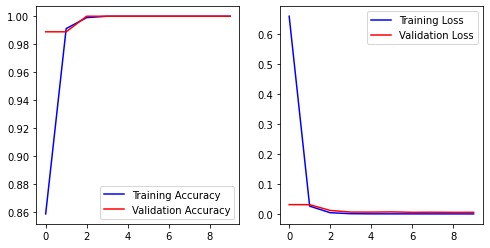

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=VGG16.predict(validation_generator)

6/6 [==============================] - 1s 160ms/step


In [ ]:
print(train_generator.class_indices)
labels_test=validation_generator.labels
data_val=validation_generator.filepaths
predictions_label=[np.argmax(element) for element in predictions]

{'car': 0, 'plane': 1, 'train': 2}


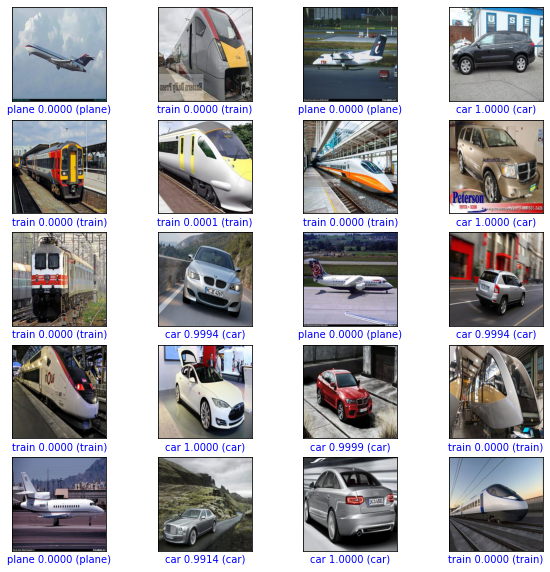

In [ ]:
class_names = ["car","plane","train"]

plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = class_names[np.argmax(predictions[index_image])]
  real_label = class_names[labels_test[index_image]]
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

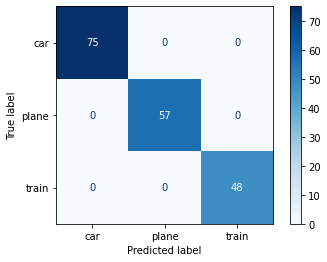

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#VGG19


In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=32,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(224,224))

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=32,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(224,224))

Found 1020 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
VGG19 = VGG19(input_shape = (224, 224, 3), include_top = False)
for layer in VGG19.layers:
  layer.trainable = False
x = Flatten()(VGG19.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(3, activation='softmax')(x)

VGG19 = Model(inputs=VGG19.inputs, outputs=output)

#opt = SGD(lr=0.001, momentum=0.9)
VGG19.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10
history = VGG19.fit(train_generator, 
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=epochs, verbose=1)

Epoch 1/10
32/32 [==============================] - 9s 244ms/step - loss: 0.5935 - accuracy: 0.8667 - val_loss: 0.0231 - val_accuracy: 0.9944
Epoch 2/10
32/32 [==============================] - 8s 233ms/step - loss: 0.0452 - accuracy: 0.9892 - val_loss: 0.0154 - val_accuracy: 0.9944
Epoch 3/10
32/32 [==============================] - 8s 236ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0270 - val_accuracy: 0.9889
Epoch 4/10
32/32 [==============================] - 8s 237ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 8s 237ms/step - loss: 3.3015e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 8s 238ms/step - loss: 6.9714e-05 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 8s 238ms/step - loss: 6.0924e-05 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1

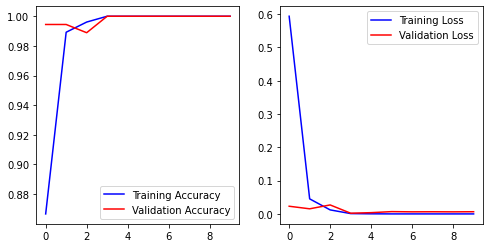

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=VGG19.predict(validation_generator)

6/6 [==============================] - 1s 189ms/step


In [ ]:
print(train_generator.class_indices)
labels_test=validation_generator.labels
data_val=validation_generator.filepaths
predictions_label=[np.argmax(element) for element in predictions]

{'car': 0, 'plane': 1, 'train': 2}


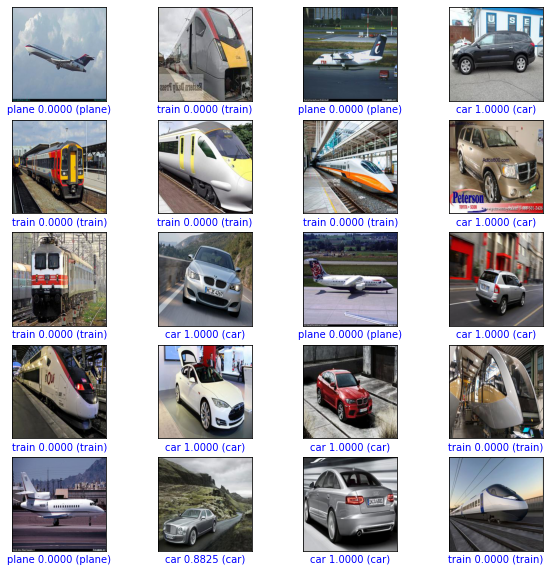

In [ ]:
class_names = ["car","plane","train"]

plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = class_names[np.argmax(predictions[index_image])]
  real_label = class_names[labels_test[index_image]]
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

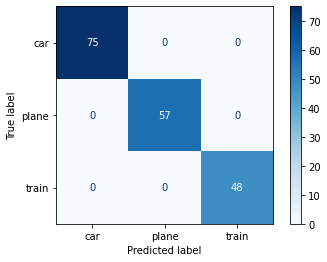

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

#Xception

In [ ]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.15)

train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=16,
seed=5,
shuffle=True,
class_mode='categorical',
target_size=(299,299))

validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=16,
seed=5,
shuffle=False,
class_mode='categorical',
target_size=(299,299))

Found 1020 validated image filenames belonging to 3 classes.
Found 180 validated image filenames belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
modelXception = Xception(include_top=False, input_shape=(299, 299, 3))
for layer in modelXception.layers:
  layer.trainable = False
x = Flatten()(modelXception.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(3, activation='softmax')(x)
modelXception = keras.Model(inputs=modelXception.inputs, outputs=output)
modelXception.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelXception.fit(train_generator, steps_per_epoch=len(train_generator),
                              validation_data=validation_generator, validation_steps=len(validation_generator), 
                              epochs=10, verbose=1)

Epoch 1/10
64/64 [==============================] - 15s 184ms/step - loss: 0.5220 - accuracy: 0.9735 - val_loss: 0.1291 - val_accuracy: 0.9889
Epoch 2/10
64/64 [==============================] - 10s 161ms/step - loss: 0.0455 - accuracy: 0.9980 - val_loss: 0.0741 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 11s 167ms/step - loss: 3.5225e-04 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 10s 162ms/step - loss: 4.6393e-10 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 10s 160ms/step - loss: 1.1975e-10 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 10s 158ms/step - loss: 1.4173e-11 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 10s 158ms/step - loss: 1.4173e-11 - accuracy: 1.0000 - val_loss: 0.0638 - 

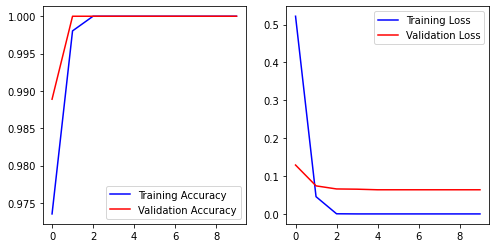

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=modelXception.predict(validation_generator)

12/12 [==============================] - 2s 127ms/step


In [ ]:
print(train_generator.class_indices)
labels_test=validation_generator.labels
data_val=validation_generator.filepaths
predictions_label=[np.argmax(element) for element in predictions]

{'car': 0, 'plane': 1, 'train': 2}


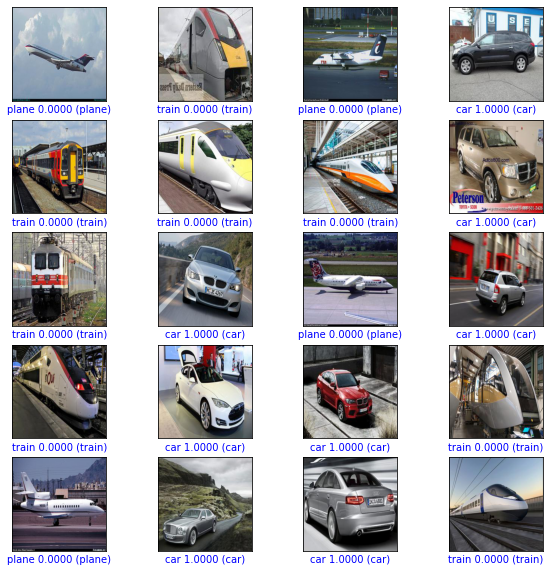

In [ ]:
class_names = ["car","plane","train"]

plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = class_names[np.argmax(predictions[index_image])]
  real_label = class_names[labels_test[index_image]]
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

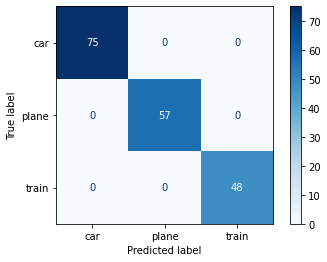

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)